### Students mark Predictor using Linear Regression

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [203]:
df= pd.read_csv('student_marks.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [205]:
df.shape

(200, 2)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [209]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [211]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

**Scatter plot**

<Axes: xlabel='study_hours', ylabel='student_marks'>

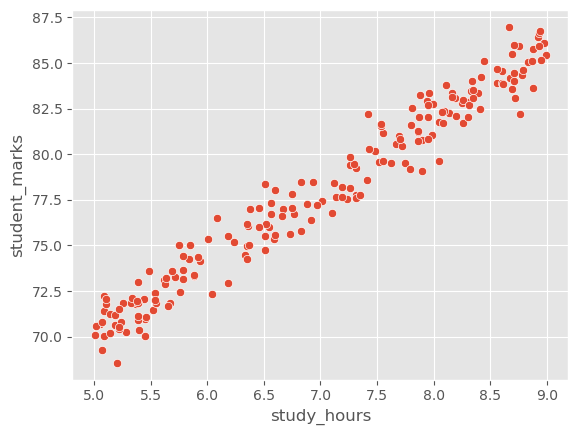

In [214]:
plt.style.use('ggplot')
sns.scatterplot(x=df.study_hours, y=df.student_marks, data=df)

#### Data Cleaning

In [217]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [219]:
df.study_hours.mean()

6.9959487179487185

***Fill empty values with MEAN using fillna***

In [222]:
df2=df.fillna(df.study_hours.mean())

In [224]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

***Split dataset***

In [227]:
x=df2.drop('student_marks',axis='columns')
y=df2.student_marks

In [229]:
(x,y)

(     study_hours
 0       6.830000
 1       6.560000
 2       6.995949
 3       5.670000
 4       8.670000
 ..           ...
 195     7.530000
 196     8.560000
 197     8.940000
 198     6.600000
 199     8.350000
 
 [200 rows x 1 columns],
 0      78.50
 1      76.74
 2      78.68
 3      71.82
 4      84.19
        ...  
 195    81.67
 196    84.68
 197    86.75
 198    78.05
 199    83.50
 Name: student_marks, Length: 200, dtype: float64)

***Test train split Data***

In [232]:
from sklearn.model_selection import train_test_split

In [234]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2) #random_state

In [236]:
x_train

,study_hours
8,5.19
7,8.99
66,7.86
11,8.56
146,7.99
...,...
186,8.87
34,8.72
165,5.38
129,6.33


In [238]:
y_train

8      70.66
7      85.46
66     81.25
11     83.88
146    82.75
       ...  
186    85.10
34     83.08
165    71.94
129    74.49
33     84.35
Name: student_marks, Length: 160, dtype: float64

***Create Model***

In [241]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [243]:
lr.coef_ #y=mx+c---> m---coef_--->slope;

array([3.95028647])

In [245]:
lr.intercept_

50.341249000012034

**So, m=3.884 and c=50.705**

**Now with predict([[]]) we can Predict the unknown values**

In [249]:
lr.predict([[5.19]])

array([70.84323579])

***Find Accuracy***

In [253]:
lr.score(x_test,y_test)

0.9243663830132339

**See the results**

In [259]:
#predicted results
y_pred=lr.predict(x_test)
y_pred

array([71.55428735, 70.44820714, 84.94575849, 78.38828295, 76.37363685,
       70.17168709, 79.88939181, 76.92667695, 84.66923844, 77.97725057,
       74.39849361, 84.74824417, 83.12862671, 85.41979287, 72.14683032,
       80.75845483, 75.86009961, 76.05761393, 80.08690613, 72.66036756,
       71.04075011, 82.22006082, 82.45707801, 85.57780432, 84.74824417,
       73.21340767, 73.45042486, 72.93688762, 77.3217056 , 77.97725057,
       81.70652358, 81.54851212, 79.69187748, 71.63329308, 80.63994624,
       84.35321552, 79.02032878, 77.97725057, 71.87031027, 73.05539621])

In [269]:
#create new data frame 
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['study_hours','student_marks_original','student_marks_predicted'])

,study_hours,student_marks_original,student_marks_predicted
0,5.370000,71.80,71.554287
1,5.090000,71.41,70.448207
2,8.760000,82.21,84.945758
3,7.100000,76.76,78.388283
4,6.590000,75.37,76.373637
5,5.020000,70.58,70.171687
6,7.480000,80.17,79.889392
7,6.730000,75.65,76.926677
8,8.690000,83.57,84.669238
9,6.995949,76.14,77.977251


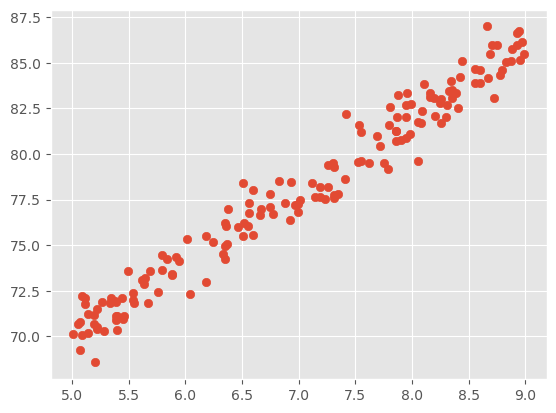

In [276]:
plt.scatter(x_train,y_train)

In [274]:
lr.predict(x_train)

array([70.84323579, 85.85432438, 81.39050066, 84.15570119, 81.90403791,
       82.25956369, 84.74824417, 81.54851212, 81.86453504, 79.02032878,
       70.44820714, 74.75401939, 80.16591186, 72.54185897, 73.21340767,
       77.51921992, 71.63329308, 83.32614104, 82.97061525, 80.95596915,
       79.02032878, 77.97725057, 78.74380873, 85.22227854, 73.56893345,
       80.44243191, 83.12862671, 70.96174438, 80.16591186, 80.08690613,
       73.09489908, 70.84323579, 75.42556809, 71.8308074 , 77.3217056 ,
       72.6208647 , 81.43000353, 70.29019568, 73.41092199, 81.46950639,
       71.90981313, 82.14105509, 78.54629441, 78.46728868, 71.87031027,
       77.97725057, 79.37585456, 70.88273865, 82.73359807, 77.00568268,
       85.61730719, 77.71673425, 79.21784311, 77.00568268, 72.22583605,
       74.08247069, 70.36920141, 85.06426708, 76.05761393, 75.54407669,
       75.86009961, 80.04740326, 82.37807228, 71.19876157, 72.58136183,
       83.48415249, 85.61730719, 72.22583605, 75.42556809, 78.74

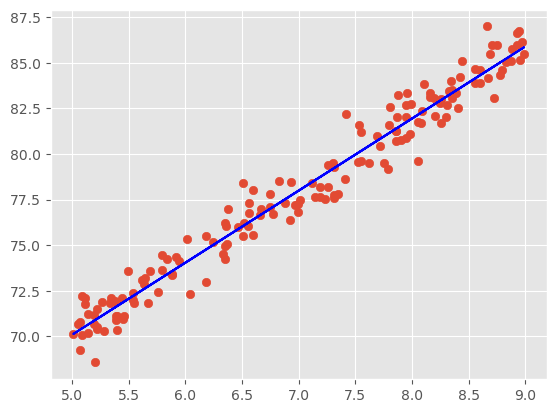

In [296]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='b')